# COVerage: Region-Specific SARS-CoV-2 News Query Algorithm 
![Searching GIF](https://thumbs.gfycat.com/BlaringGaseousEsok-small.gif)
Searching gif https://gfycat.com/blaringgaseousesok

In [26]:
# One time run - installs dependencies

import matplotlib.pyplot as plt
from newspaper import fulltext
from nltk.corpus import wordnet
import math
import requests
import numpy as np
import pandas as pd 
from IPython.display import display, HTML
from GoogleNews import GoogleNews
from rank_bm25 import BM25Okapi



In [28]:
def lavaa_extractive(query, url):
    lavaa = 0
    text = (fulltext(requests.get(url).text)).replace("\n", " ")

    query_words = query.split()
    text_words = text.split()
    text_words_len = len(text_words)
    for word in text_words:
        if word in query_words:
            lavaa += 1
    s_query = 10*(lavaa/text_words_len)
    return 1 / (1 + math.exp(-s_query))

def lavaa_abstractive(query, url):
    syn = list()
    query_words = query.split()
    for word in query_words:
        if word != "news":
            for synset in wordnet.synsets(word):
               for lemma in synset.lemmas():
                  syn.append(lemma.name())
            
    lavaa = 0
    try:
        text = (fulltext(requests.get(url).text)).replace("\n", " ")
    except:
        return 0
    text_words = text.split()
    text_words_len = len(text_words)
    for word in text_words:
        if word in query_words or word in syn:
            lavaa += 1
    s_query = 10*(lavaa/text_words_len)

    return 1 / (1 + math.exp(-s_query))

In [30]:
def bm25_metric(query, url):
    try:
        text = (fulltext(requests.get(url).text)).replace("\n", " ")
    except:
        return 0.2
    text_corpus = text.split()
    bm25 = BM25Okapi(text_corpus)
    query_tokens = query.split(" ")
    doc_scores = bm25.get_scores(query_tokens)
    return doc_scores
print(bm25_metric("Ramsey County Minnesota policy law", "https://www.twincities.com/2020/07/16/ramsey-county-judge-hears-arguments-alleging-gov-walzs-executive-orders-violate-civil-liberties/"))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [32]:
# Google News Query

def query_urls(query):
    urls = []
    googlenews = GoogleNews()
    googlenews.setlang('en')
    googlenews.search(query)
    results = googlenews.result()
    count = 3
    for i in range(count):
        url = results[i]['link']
        try:
            text = (fulltext(requests.get(url).text)).replace("\n", " ")
        except:
            count += 1
        urls.append(url)
    return urls[0], urls[1], urls[2]

query_urls("Ramsey County Minnesota policy law")

('https://www.startribune.com/voter-suit-aims-to-block-mask-mandate-at-minnesota-polling-places/572006782/',
 'https://www.twincities.com/2020/07/16/ramsey-county-judge-hears-arguments-alleging-gov-walzs-executive-orders-violate-civil-liberties/',
 'https://kstp.com/news/could-officer-hiring-crisis-lead-to-end-of-small-town-police-departments-minnesota/5785217/')

# Query 1 - Ramsey County, Minnesota: Law
![Image of Ramsey County](https://www.ramseycounty.us/sites/default/files/styles/section_lead_in/public/Departments/Workforce%20Solutions/GovCenterEastbuilding_0.jpg?itok=qu2oQuJm)

In [34]:
# URL's determined by Google News search algorithm

query1 = "International Coronavirus Vaccine news"
url1_1, url1_2, url1_3 = query_urls(query1)

query2 = "Global COVID-19 Medicine"
url2_1, url2_2, url2_3 = query_urls(query2)

query3 = "International COVID-19 Biology"
url3_1, url3_2, url3_3 = query_urls(query3)

score1_1 = lavaa_abstractive(query1, url1_1)
score1_2 = lavaa_abstractive(query1, url1_2)
score1_3 = lavaa_abstractive(query1, url1_3)
score2_1 = lavaa_abstractive(query2, url2_1)
score2_2 = lavaa_abstractive(query2, url2_2)
score2_3 = lavaa_abstractive(query2, url2_3)
score3_1 = lavaa_abstractive(query3, url3_1)
score3_2 = lavaa_abstractive(query3, url3_2)
score3_3 = lavaa_abstractive(query3, url3_3)

score1_vals = [score1_1, score1_2, score1_3]
score2_vals = [score2_1, score2_2, score2_3]
score3_vals = [score3_1, score3_2, score3_3]

In [36]:
def visualization(queries, score_vals):
    query1 = queries[0]
    query2 = queries[1]
    query3 = queries[2]
    score1_vals = score_vals[0]
    score2_vals = score_vals[1]
    score3_vals = score_vals[2]

    index = np.arange(3)
    width = 0.20
    fig = plt.figure()
    ax = fig.add_subplot(111)

    col1 = ax.bar(index, score1_vals, width, color='b')
    col2 = ax.bar(index+width, score2_vals, width, color='cornflowerblue')
    col3 = ax.bar(index+width*2, score3_vals, width, color='lightsteelblue')

    ax.set_ylabel('COVerage Local Query Metric (LQM)')
    ax.set_xlabel('Queries')
    ax.set_xticks(index+width)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticklabels((query1, query2, query3), rotation=15)
    ax.legend((col1[0], col2[0], col3[0]), ('First result of Google News search', 'Second result of Google News search', 'Third result of Google News search'))
    plt.show()

    score1_av = sum(score1_vals) / len(score1_vals)
    score2_av = sum(score2_vals) / len(score2_vals)
    score3_av = sum(score3_vals) / len(score3_vals)
    scores_av = [score1_av, score2_av, score3_av]

    # Calling DataFrame constructor after zipping 
    # both lists, with columns specified 
    df = pd.DataFrame(list(zip([query1, query2, query3], scores_av)), 
                   columns =['Query', 'Average LQM']) 
    display(df)


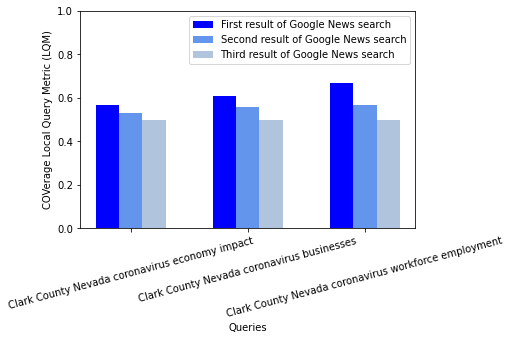

,Query,Average LQM
0,Clark County Nevada coronavirus economy impact,0.615257
1,Clark County Nevada coronavirus businesses,0.550362
2,Clark County Nevada coronavirus workforce empl...,0.500000


In [38]:
visualization([query1, query2, query3], [score1_vals, score2_vals, score3_vals])

# Query 2 - Clark County, Nevada: Economy
![Clark County Image](https://www.clarkcountynv.gov/brc/PublishingImages/ED_Clip1.jpg)

In [40]:
query1 = "Clark County Nevada coronavirus economy impact"
url1_1, url1_2, url1_3 = query_urls(query1)

query2 = "Clark County Nevada coronavirus businesses"
url2_1, url2_2, url2_3 = query_urls(query2)

query3 = "Clark County Nevada coronavirus workforce employment"
url3_1, url3_2, url3_3 = query_urls(query3)

score1_1 = lavaa_abstractive(query1, url1_1)
score1_2 = lavaa_abstractive(query1, url1_2)
score1_3 = lavaa_abstractive(query1, url1_3)
score2_1 = lavaa_abstractive(query2, url2_1)
score2_2 = lavaa_abstractive(query2, url2_2)
score2_3 = lavaa_abstractive(query2, url2_3)
score3_1 = lavaa_abstractive(query3, url3_1)
score3_2 = lavaa_abstractive(query3, url3_2)
score3_3 = lavaa_abstractive(query3, url3_3)

score1_vals = [score1_1, score1_2, score1_3]
score2_vals = [score2_1, score2_2, score2_3]
score3_vals = [score3_1, score3_2, score3_3]

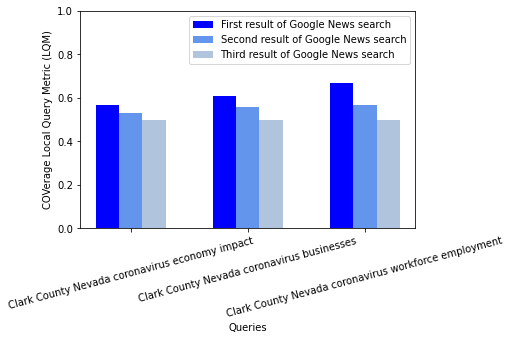

,Query,Average LQM
0,Clark County Nevada coronavirus economy impact,0.615257
1,Clark County Nevada coronavirus businesses,0.550362
2,Clark County Nevada coronavirus workforce empl...,0.500000


In [42]:
visualization([query1, query2, query3], [score1_vals, score2_vals, score3_vals])

# Query 3 - Sedgwick County, Kansas: Statistics
![Sedgwick County, Kansas](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Sedgwick_county_kansas_courthouse_2009.jpg/1200px-Sedgwick_county_kansas_courthouse_2009.jpg)

In [43]:
query1 = "Manhattan, NY COVID-19 Vaccine"
url1_1, url1_2, url1_3 = query_urls(query1)

query2 = "Manhattan, NY Coronavirus Biology"
url2_1, url2_2, url2_3 = query_urls(query2)

query3 = "Manhattan, NY Coronavirus Medicine"
url3_1, url3_2, url3_3 = query_urls(query3)

score1_1 = lavaa_abstractive(query1, url1_1)
score1_2 = lavaa_abstractive(query1, url1_2)
score1_3 = lavaa_abstractive(query1, url1_3)
score2_1 = lavaa_abstractive(query2, url2_1)
score2_2 = lavaa_abstractive(query2, url2_2)
score2_3 = lavaa_abstractive(query2, url2_3)
score3_1 = lavaa_abstractive(query3, url3_1)
score3_2 = lavaa_abstractive(query3, url3_2)
score3_3 = lavaa_abstractive(query3, url3_3)

score1_vals = [score1_1, score1_2, score1_3]
score2_vals = [score2_1, score2_2, score2_3]
score3_vals = [score3_1, score3_2, score3_3]

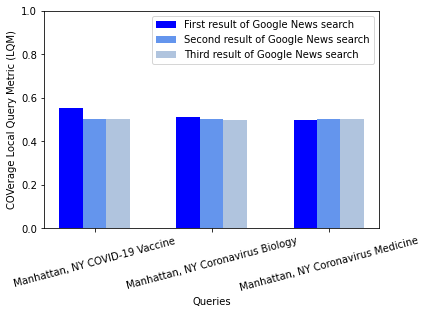

,Query,Average LQM
0,"Manhattan, NY COVID-19 Vaccine",0.522390
1,"Manhattan, NY Coronavirus Biology",0.503168
2,"Manhattan, NY Coronavirus Medicine",0.502845


In [44]:
visualization([query1, query2, query3], [score1_vals, score2_vals, score3_vals])